In [352]:
# This line to ensure the use of plots within Jupyter
%matplotlib inline
# We import the necessary libraries
import pandas as pd
import numpy as np
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer

class Parser:
    
    def __init__(self, url):  
        http = Http()
        status, response = http.request(url)
        tables = BeautifulSoup(response, "lxml", 
                              parse_only=SoupStrainer("table", {"class":"wikitable sortable"}))
        self.table = tables.contents[1]
    
    def parse_table(self):      
        rows = self.table.find_all("tr")
        header = self.parse_header(rows[0])
        table_array = [self.parse_row(row) for row in rows[1:]]
        table_df = pd.DataFrame(table_array, columns=header).apply(self.clean_table, 1)
        return table_df.replace({"Year":{'':np.nan}})
        
    def parse_row(self, row):     
        columns = row.find_all("td")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != '']
    
    def parse_header(self, row):     
        columns = row.find_all("th")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != ""]
    
    def clean_table(self, row):
        if not row.iloc[0].isdigit() and row.iloc[0] != '':
            return row.shift(1)
        else:
            return row
        
url = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics"        
parser = Parser(url)   
nobel_df = parser.parse_table()
pd.options.display.max_rows=300
nobel_df

,Year,Laureate[A],Country[B],Rationale[C]
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,NaN,Pieter Zeeman,Netherlands,None
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,NaN,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,NaN,Maria Skłodowska-Curie,Poland\n France,None
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [353]:
nobel_df.columns=["Year","Laureate","Country","Rationale"]
nobel_df.dropna(subset=["Country"],inplace=True)
nobel_df.fillna(method="ffill",inplace=True)
nobel_df

,Year,Laureate,Country,Rationale
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t..."
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p..."
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [354]:
nobel_df.isnull().any()

Year         False
Laureate     False
Country      False
Rationale    False
dtype: bool

In [355]:
nobel_df.nunique()

Year         110
Laureate     203
Country       42
Rationale    131
dtype: int64

In [356]:
numof_physicists = nobel_df.Laureate.nunique()
numof_physicists

203

In [357]:
numof_countries = nobel_df.Country.nunique()
numof_countries

42

In [358]:
nobel_df["Country_list"] =  nobel_df["Country"].str.split("\n")
countries = pd.Series(sum(nobel_df["Country_list"].tolist(), [])).str.strip()
countries

0              Germany
1          Netherlands
2          Netherlands
3               France
4               France
5               Poland
6               France
7       United Kingdom
8      Austria-Hungary
9              Germany
10      United Kingdom
11       United States
12              Poland
13              France
14               Italy
15             Germany
16         Netherlands
17             Germany
18              Sweden
19         Netherlands
20             Germany
21      United Kingdom
22           Australia
23      United Kingdom
24      United Kingdom
25             Germany
26             Germany
27         Switzerland
28             Germany
29         Switzerland
30             Denmark
31       United States
32              Sweden
33             Germany
34             Germany
35              France
36       United States
37      United Kingdom
38      United Kingdom
39              France
40               India
41             Germany
42             Austria
43      Uni

In [359]:
countries.value_counts()

United States      94
United Kingdom     27
Germany            18
France             13
Japan              11
Netherlands        10
West Germany        9
Soviet Union        7
Russia              5
Switzerland         5
Italy               5
Sweden              4
Canada              4
Poland              4
Austria             3
China               3
Denmark             3
Australia           2
Hungary             2
India               2
Hong Kong           1
Austria-Hungary     1
Pakistan            1
Ireland             1
Norway              1
Belgium             1
dtype: int64

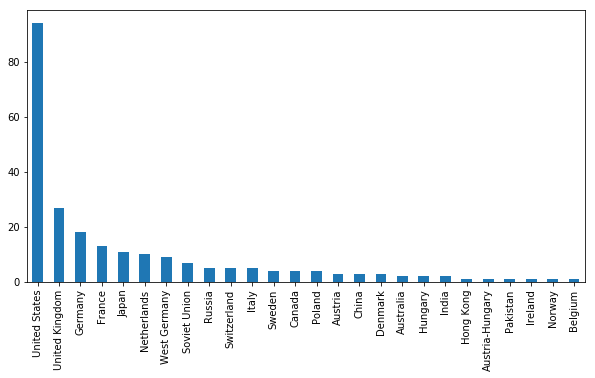

In [360]:
import matplotlib.pyplot as plt

countries.value_counts().plot(kind="bar", figsize=(10,5))

In [361]:
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer

http = Http()
status, response = http.request(url)

table = BeautifulSoup(response, "lxml", parse_only=SoupStrainer('table'))
link_df = pd.DataFrame([[x.string, x["href"]] for x in table.contents[1].find_all("a")],
                       columns=["Text", "link"]).drop_duplicates()

link_df

,Text,link
0,[A],#endnote_1
1,[B],#endnote_2
2,[C],#endnote_3
3,None,/wiki/File:WilhelmR%C3%B6ntgen.JPG
4,Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen
5,Germany,/wiki/German_Empire
6,rays,/wiki/R%C3%B6ntgen_ray
7,[7],#cite_note-7
8,None,/wiki/File:H_A_Lorentz_(Nobel).jpg
9,Hendrik Lorentz,/wiki/Hendrik_Lorentz


In [362]:
link_df.columns=["Laureate","Link"]
link_df
nobel_merged_df = nobel_df.merge(link_df, on="Laureate", how="inner")
nobel_merged_df

,Year,Laureate,Country,Rationale,Country_list,Link
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh"
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...","[United States, Poland]",/wiki/Albert_Abraham_Michelson


In [363]:
def get_text(link, root_website = "https://en.wikipedia.org"):    
    http = Http()
    status, response = http.request(root_website + link)

    body = BeautifulSoup(response, "lxml", parse_only=SoupStrainer("div", {"id":"mw-content-text"}))
    return BeautifulSoup.get_text(body.contents[1])

nobel_merged_df.set_index("Laureate", inplace=True)

nobel_merged_df["Bio"] =  nobel_merged_df["Link"].apply(get_text)
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen                             \n\nWilhelm Röntgen\n\n\n\n\n\nBorn\nWilhelm C...
Hendrik Lorentz                                    Not to be confused with Hendrikus Albertus Lor...
Pieter Zeeman                                      \n\nPieter Zeeman\n\n\n\n\n\nBorn\n(1865-05-25...
Antoine Henri Becquerel                            For other uses, see Becquerel (disambiguation)...
Pierre Curie                                       \n\nPierre Curie\n\n\n\n\n\nBorn\n(1859-05-15)...
Maria Skłodowska-Curie                             This article is about the Polish physicist. Fo...
Lord Rayleigh                                      \n\nThe Lord Rayleigh\nOM PRS\n\n\n\n\n\nBorn\...
Philipp Eduard Anton von Lenard                    "Waterfall effect" redirects here. For the ill...
Joseph John Thomson                                This article is about the Nobel laureate and p...
Albert Abraham Michelson                           Not to be confused with the ath

In [364]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [365]:
for p in punctuation + "1234567890":
    nobel_merged_df["Bio"][0] = nobel_merged_df["Bio"][0].replace(p,'').lower()  
    
nobel_merged_df["Bio"][0]

'\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm conrad röntgen\n march \nlennep rhine province german confederation\n\n\ndied\n february  aged\xa0\nmunich bavaria germany\n\n\nnationality\ngerman\n\n\nalma\xa0mater\n\n\n\neth zurich\nuniversity of zurich\n\n\n\n\n\nknown\xa0for\ndiscovery of xrays\n\n\nawards\nmatteucci medal \nrumford medal \nelliott cresson medal \nbarnard medal \nnobel prize in physics \n\n\nscientific career\n\n\nfields\nphysics\nxray astronomy\n\n\ninstitutions\n\n\n\nuniversity of strassburg\nuniversity of hohenheim\nuniversity of giessen\nuniversity of würzburg\nuniversity of munich\n\n\n\n\n\ndoctoral advisor\naugust kundt\n\n\ndoctoral students\n\n\n\nherman march\nabram ioffe\nernst wagner\nrudolf ladenburg\n\n\n\n\n\nother\xa0notable students\nfranz s exner\n\n\n\n\n\nsignature\n\n\n\n\n\nwilhelm conrad röntgen ˈrɛntɡən dʒən ˈrʌnt german ˈvɪlhɛlm ˈʁœntɡən  march \xa0–  february  was a german mechanical engineer and physicist who on  november  produced and dete

In [366]:
def clean_string(string):
    for p in punctuation + "1234567890":
        string = string.replace(p,'').lower()
    return string
        
nobel_merged_df["Bio"] = nobel_merged_df["Bio"].apply(clean_string)
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen                             \n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...
Hendrik Lorentz                                    not to be confused with hendrikus albertus lor...
Pieter Zeeman                                      \n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...
Antoine Henri Becquerel                            for other uses see becquerel disambiguation\n\...
Pierre Curie                                       \n\npierre curie\n\n\n\n\n\nborn\n may \nparis...
Maria Skłodowska-Curie                             this article is about the polish physicist for...
Lord Rayleigh                                      \n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...
Philipp Eduard Anton von Lenard                    waterfall effect redirects here for the illuso...
Joseph John Thomson                                this article is about the nobel laureate and p...
Albert Abraham Michelson                           not to be confused with the ath

In [367]:
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio"].str.split("\s")
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [, , wilhelm, röntgen, , , , , , born, wilhelm...
Hendrik Lorentz                                    [not, to, be, confused, with, hendrikus, alber...
Pieter Zeeman                                      [, , pieter, zeeman, , , , , , born, , may, , ...
Antoine Henri Becquerel                            [for, other, uses, see, becquerel, disambiguat...
Pierre Curie                                       [, , pierre, curie, , , , , , born, , may, , p...
Maria Skłodowska-Curie                             [this, article, is, about, the, polish, physic...
Lord Rayleigh                                      [, , the, lord, rayleigh, om, prs, , , , , , b...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, here, for, the,...
Joseph John Thomson                                [this, article, is, about, the, nobel, laureat...
Albert Abraham Michelson                           [not, to, be, confused, with, t

In [368]:
def remove(list_to_clean, element_to_remove=[None,""]):
    new_list = [x for x in list_to_clean if x not in element_to_remove]
    return new_list

nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [not, to, be, confused, with, hendrikus, alber...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [for, other, uses, see, becquerel, disambiguat...
Pierre Curie                                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie                             [this, article, is, about, the, polish, physic...
Lord Rayleigh                                      [the, lord, rayleigh, om, prs, born, november,...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, here, for, the,...
Joseph John Thomson                                [this, article, is, about, the, nobel, laureat...
Albert Abraham Michelson                           [not, to, be, confused, with, t

In [369]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/BPD/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [370]:
from nltk.corpus import stopwords
words_to_remove = set(stopwords.words('english'))

nobel_merged_df["Bio_list"] =  nobel_merged_df["Bio_list"].apply(remove, element_to_remove = words_to_remove)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [confused, hendrikus, albertus, lorentz, ludvi...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie                             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson                           [confused, athlete, albert, mic

In [371]:
def remove_one(list_to_clean):
    new_list2 = [x for x in list_to_clean if len(x)>1]
    return new_list2

nobel_merged_df["Bio_list"] =  nobel_merged_df["Bio_list"].apply(remove_one)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [confused, hendrikus, albertus, lorentz, ludvi...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie                             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson                           [confused, athlete, albert, mic

In [372]:
from collections import Counter

In [373]:
def remove_n_occurance(list_to_clean, n = 1):
    C = Counter(list_to_clean)
    new_list3 = [x for x in list(C.keys()) if C[x] >= n]
    return new_list3
 
nobel_merged_df["Bio_list"] = [remove_n_occurance(x, n=5) for x in list(nobel_merged_df.Bio_list)]
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, conrad, german, munich, zur...
Hendrik Lorentz                                    [lorentz, see, also, hendrik, antoon, july, ne...
Pieter Zeeman                                      [pieter, zeeman, netherlands, amsterdam, leide...
Antoine Henri Becquerel                            [see, becquerel, antoine, henri, école, des, e...
Pierre Curie                                       [pierre, curie, paris, april, university, know...
Maria Skłodowska-Curie                             [polish, physicist, marie, curie, name, family...
Lord Rayleigh                                      [lord, rayleigh, essex, june, cambridge, theor...
Philipp Eduard Anton von Lenard                    [effect, philipp, lenard, von, hungarian, germ...
Joseph John Thomson                                [nobel, thomson, sir, born, joseph, john, dece...
Albert Abraham Michelson                           [albert, michelson, california,

In [374]:
def remove_duplicates(list_to_clean):
    list2 = []
    for x in list_to_clean:
        list2.append(x)
    return list2

nobel_merged_df["Bio_list"]=nobel_merged_df["Bio_list"].apply(remove_duplicates)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, conrad, german, munich, zur...
Hendrik Lorentz                                    [lorentz, see, also, hendrik, antoon, july, ne...
Pieter Zeeman                                      [pieter, zeeman, netherlands, amsterdam, leide...
Antoine Henri Becquerel                            [see, becquerel, antoine, henri, école, des, e...
Pierre Curie                                       [pierre, curie, paris, april, university, know...
Maria Skłodowska-Curie                             [polish, physicist, marie, curie, name, family...
Lord Rayleigh                                      [lord, rayleigh, essex, june, cambridge, theor...
Philipp Eduard Anton von Lenard                    [effect, philipp, lenard, von, hungarian, germ...
Joseph John Thomson                                [nobel, thomson, sir, born, joseph, john, dece...
Albert Abraham Michelson                           [albert, michelson, california,

In [375]:
physics_df = pd.DataFrame({"Field": ["Nuclear physics",
                                     "Particle physics", 
                                     "Atomic, molecular, and optical physics", 
                                     "Condensed matter physics", 
                                     "Astrophysics",
                                     "Physical_cosmology"],
                           "link": ["/wiki/Nuclear_physics",
                                     "/wiki/Particle_physics", 
                                     "/wiki/Atomic,_molecular,_and_optical_physics", 
                                     "/wiki/Condensed_matter_physics", 
                                     "/wiki/Astrophysics",
                                     "/wiki/Physical_cosmology"]})

physics_df.set_index("Field", inplace=True)

In [376]:
physics_df

,link
Field,
Nuclear physics,/wiki/Nuclear_physics
Particle physics,/wiki/Particle_physics
"Atomic, molecular, and optical physics","/wiki/Atomic,_molecular,_and_optical_physics"
Condensed matter physics,/wiki/Condensed_matter_physics
Astrophysics,/wiki/Astrophysics
Physical_cosmology,/wiki/Physical_cosmology


In [377]:
def get_text(link, root_website = "https://en.wikipedia.org"):    
    http = Http()
    status, response = http.request(root_website + link)

    body = BeautifulSoup(response, "lxml", parse_only=SoupStrainer("div", {"id":"mw-content-text"}))
    return BeautifulSoup.get_text(body.contents[1])

# TODO: extract the text of the wikipedia page associated to each physicist
physics_df["link"] =  physics_df["link"].apply(get_text)
physics_df["link"]

Field
Nuclear physics                           This article is about the study of atomic nucl...
Particle physics                          For other uses of the word "particle" in physi...
Atomic, molecular, and optical physics    \n\nQuantum mechanics\n\n\n\n\n\n\n\n\n\nH\n^\...
Condensed matter physics                  \n\nCondensed matter physics\n\n\n\n\n\nPhases...
Astrophysics                              This article is about the use of physics and c...
Physical_cosmology                        This article is about the branch of physics an...
Name: link, dtype: object

In [378]:
physics_df["link"] = physics_df["link"].str.split("\s")
physics_df["link"]

Field
Nuclear physics                           [This, article, is, about, the, study, of, ato...
Particle physics                          [For, other, uses, of, the, word, "particle", ...
Atomic, molecular, and optical physics    [, , Quantum, mechanics, , , , , , , , , , H, ...
Condensed matter physics                  [, , Condensed, matter, physics, , , , , , Pha...
Astrophysics                              [This, article, is, about, the, use, of, physi...
Physical_cosmology                        [This, article, is, about, the, branch, of, ph...
Name: link, dtype: object

In [379]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
set(stopwords.words('english'))

words_to_remove = set(stopwords.words('english'))

physics_df["link"] = physics_df["link"].apply(remove, element_to_remove = words_to_remove)
physics_df["link"]

[nltk_data] Downloading package stopwords to /Users/BPD/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Field
Nuclear physics                           [This, article, study, atomic, nuclei., For, u...
Particle physics                          [For, uses, word, "particle", physics, elsewhe...
Atomic, molecular, and optical physics    [, , Quantum, mechanics, , , , , , , , , , H, ...
Condensed matter physics                  [, , Condensed, matter, physics, , , , , , Pha...
Astrophysics                              [This, article, use, physics, chemistry, deter...
Physical_cosmology                        [This, article, branch, physics, astronomy., F...
Name: link, dtype: object

In [380]:
physics_df["link"] = physics_df["link"].apply(remove_one)
physics_df["link"]

Field
Nuclear physics                           [This, article, study, atomic, nuclei., For, u...
Particle physics                          [For, uses, word, "particle", physics, elsewhe...
Atomic, molecular, and optical physics    [Quantum, mechanics, {\displaystyle, {\hat, {H...
Condensed matter physics                  [Condensed, matter, physics, Phases, Phase, tr...
Astrophysics                              [This, article, use, physics, chemistry, deter...
Physical_cosmology                        [This, article, branch, physics, astronomy., F...
Name: link, dtype: object

In [381]:
physics_df["link"]=[remove_n_occurance(x, n=5) for x in list(physics_df.link)]
physics_df["link"]

Field
Nuclear physics                           [This, atomic, For, Nuclear, physics, matter, ...
Particle physics                          [physics, particle, Standard, Model, particles...
Atomic, molecular, and optical physics    [Quantum, mechanics, {\displaystyle, Schröding...
Condensed matter physics                  [Condensed, matter, physics, Phase, transition...
Astrophysics                              [use, physics, astronomical, positions, physic...
Physical_cosmology                        [This, physics, For, Cosmology., Cosmic, Physi...
Name: link, dtype: object

In [382]:
physics_df["link"]=physics_df["link"].apply(remove_duplicates)
physics_df["link"]

Field
Nuclear physics                           [This, atomic, For, Nuclear, physics, matter, ...
Particle physics                          [physics, particle, Standard, Model, particles...
Atomic, molecular, and optical physics    [Quantum, mechanics, {\displaystyle, Schröding...
Condensed matter physics                  [Condensed, matter, physics, Phase, transition...
Astrophysics                              [use, physics, astronomical, positions, physic...
Physical_cosmology                        [This, physics, For, Cosmology., Cosmic, Physi...
Name: link, dtype: object

In [383]:
def intersect_count(list1, list2):
    intr = len(set(list1).intersection(list2))
    return intr

nobel_merged_df["Count_intersect_Nuclear"] = [intersect_count(list1=x, list2=physics_df.loc["Nuclear physics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Particle"] = [intersect_count(list1=x, list2=physics_df.loc["Particle physics"]["link"]) for x in nobel_merged_df["Bio_list"]]  
nobel_merged_df["Count_intersect_Atomic"] =  [intersect_count(list1=x, list2=physics_df.loc["Atomic, molecular, and optical physics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Condensed"] = [intersect_count(list1=x, list2=physics_df.loc["Condensed matter physics"]["link"]) for x in nobel_merged_df["Bio_list"]] 
nobel_merged_df["Count_intersect_Astrophysics"] = [intersect_count(list1=x, list2=physics_df.loc["Astrophysics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Cosmology"] =  [intersect_count(list1=x, list2=physics_df.loc["Physical_cosmology"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df

,Year,Country,Rationale,Country_list,Link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology
Laureate,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[wilhelm, röntgen, conrad, german, munich, zur...",3,2,2,5,1,4
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[lorentz, see, also, hendrik, antoon, july, ne...",9,10,10,9,4,14
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[pieter, zeeman, netherlands, amsterdam, leide...",3,2,3,4,1,4
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[see, becquerel, antoine, henri, école, des, e...",4,4,4,3,3,4
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[pierre, curie, paris, april, university, know...",4,4,2,4,5,4
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[polish, physicist, marie, curie, name, family...",14,6,7,10,6,18
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[lord, rayleigh, essex, june, cambridge, theor...",3,2,3,4,2,3
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[effect, philipp, lenard, von, hungarian, germ...",2,3,1,4,2,3
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[nobel, thomson, sir, born, joseph, john, dece...",16,11,11,14,5,17


In [384]:
def total_count(list1, list2):
    tot = len(set(list1).symmetric_difference(list2))
    return tot

nobel_merged_df["Count_total_Nuclear"] = [total_count(list1=x, list2=physics_df.loc["Nuclear physics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Particle"] = [total_count(list1=x, list2=physics_df.loc["Particle physics"]["link"]) for x in nobel_merged_df["Bio_list"]]  
nobel_merged_df["Count_total_Atomic"] =  [total_count(list1=x, list2=physics_df.loc["Atomic, molecular, and optical physics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Condensed"] = [total_count(list1=x, list2=physics_df.loc["Condensed matter physics"]["link"]) for x in nobel_merged_df["Bio_list"]] 
nobel_merged_df["Count_total_Astrophysics"] = [total_count(list1=x, list2=physics_df.loc["Astrophysics"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Cosmology"] =  [total_count(list1=x, list2=physics_df.loc["Physical_cosmology"]["link"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df

,Year,Country,Rationale,Country_list,Link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology,Count_total_Nuclear,Count_total_Particle,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[wilhelm, röntgen, conrad, german, munich, zur...",3,2,2,5,1,4,108,113,88,162,84,162
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[lorentz, see, also, hendrik, antoon, july, ne...",9,10,10,9,4,14,162,163,138,220,144,208
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[pieter, zeeman, netherlands, amsterdam, leide...",3,2,3,4,1,4,107,112,85,163,83,161
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[see, becquerel, antoine, henri, école, des, e...",4,4,4,3,3,4,116,119,94,176,90,172
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[pierre, curie, paris, april, university, know...",4,4,2,4,5,4,114,117,96,172,84,170
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[polish, physicist, marie, curie, name, family...",14,6,7,10,6,18,248,267,240,314,236,296
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[lord, rayleigh, essex, june, cambridge, theor...",3,2,3,4,2,3,121,126,99,177,95,177
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[effect, philipp, lenard, von, hungarian, germ...",2,3,1,4,2,3,110,111,90,164,82,164
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[nobel, thomson, sir, born, joseph, john, dece...",16,11,11,14,5,17,176,189,164,238,170,230


In [385]:
nobel_merged_df["Proba_Nuclear"]=nobel_merged_df.Count_intersect_Nuclear / nobel_merged_df.Count_total_Nuclear
nobel_merged_df["Proba_Particle"]=nobel_merged_df.Count_intersect_Particle / nobel_merged_df.Count_total_Particle
nobel_merged_df["Proba_Atomic"]=nobel_merged_df.Count_intersect_Atomic / nobel_merged_df.Count_total_Atomic
nobel_merged_df["Proba_Condensed"]=nobel_merged_df.Count_intersect_Condensed / nobel_merged_df.Count_total_Condensed
nobel_merged_df["Proba_Astrophysics"]=nobel_merged_df.Count_intersect_Astrophysics / nobel_merged_df.Count_total_Astrophysics
nobel_merged_df["Proba_Cosmology"]=nobel_merged_df.Count_intersect_Cosmology / nobel_merged_df.Count_total_Cosmology
nobel_merged_df

,Year,Country,Rationale,Country_list,Link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,...,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[wilhelm, röntgen, conrad, german, munich, zur...",3,2,2,...,88,162,84,162,0.027778,0.017699,0.022727,0.030864,0.011905,0.024691
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[lorentz, see, also, hendrik, antoon, july, ne...",9,10,10,...,138,220,144,208,0.055556,0.061350,0.072464,0.040909,0.027778,0.067308
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[pieter, zeeman, netherlands, amsterdam, leide...",3,2,3,...,85,163,83,161,0.028037,0.017857,0.035294,0.024540,0.012048,0.024845
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[see, becquerel, antoine, henri, école, des, e...",4,4,4,...,94,176,90,172,0.034483,0.033613,0.042553,0.017045,0.033333,0.023256
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[pierre, curie, paris, april, university, know...",4,4,2,...,96,172,84,170,0.035088,0.034188,0.020833,0.023256,0.059524,0.023529
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[polish, physicist, marie, curie, name, family...",14,6,7,...,240,314,236,296,0.056452,0.022472,0.029167,0.031847,0.025424,0.060811
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[lord, rayleigh, essex, june, cambridge, theor...",3,2,3,...,99,177,95,177,0.024793,0.015873,0.030303,0.022599,0.021053,0.016949
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[effect, philipp, lenard, von, hungarian, germ...",2,3,1,...,90,164,82,164,0.018182,0.027027,0.011111,0.024390,0.024390,0.018293
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[nobel, thomson, sir, born, joseph, john, dece...",16,11,11,...,164,238,170,230,0.090909,0.058201,0.067073,0.058824,0.029412,0.073913


In [386]:
#Expectation
likelihood = {nobel_merged_df["Proba_Nuclear"].idxmax('rows'), nobel_merged_df["Proba_Particle"].idxmax('rows'),nobel_merged_df["Proba_Atomic"].idxmax('rows'),nobel_merged_df["Proba_Condensed"].idxmax('rows'),nobel_merged_df["Proba_Astrophysics"].idxmax('rows'),nobel_merged_df["Proba_Cosmology"].idxmax('rows')}
likelihood

{'Albert Einstein',
 'Arno Allan Penzias',
 'James Chadwick',
 'Niels Bohr',
 'Steven Weinberg'}

In [387]:
proba_cols = ["Proba_Nuclear",
              "Proba_Particle",
              "Proba_Atomic",
              "Proba_Condensed",
              "Proba_Astrophysics",
              "Proba_Cosmology"]

# We normalize the probability to 1
nobel_merged_df[proba_cols] = nobel_merged_df[proba_cols].apply(lambda x: x / sum(x), 1)
nobel_merged_df[proba_cols]


,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,
Wilhelm Conrad Röntgen,0.204754,0.130462,0.167526,0.227504,0.087752,0.182003
Hendrik Lorentz,0.170749,0.188557,0.222716,0.125733,0.085375,0.206869
Pieter Zeeman,0.196586,0.125207,0.247467,0.172063,0.084477,0.174200
Antoine Henri Becquerel,0.187117,0.182400,0.230911,0.092496,0.180880,0.126196
Pierre Curie,0.178638,0.174057,0.106066,0.118400,0.303046,0.119792
Maria Skłodowska-Curie,0.249596,0.099358,0.128958,0.140809,0.112409,0.268870
Lord Rayleigh,0.188442,0.120643,0.230319,0.171763,0.160011,0.128822
Philipp Eduard Anton von Lenard,0.147349,0.219032,0.090046,0.197663,0.197663,0.148247
Joseph John Thomson,0.240289,0.153836,0.177287,0.155481,0.077741,0.195366


In [393]:
#list of physicist
nobel_merged_df[proba_cols].idxmax(axis=1)

Laureate
Wilhelm Conrad Röntgen                                Proba_Condensed
Hendrik Lorentz                                          Proba_Atomic
Pieter Zeeman                                            Proba_Atomic
Antoine Henri Becquerel                                  Proba_Atomic
Pierre Curie                                       Proba_Astrophysics
Maria Skłodowska-Curie                                Proba_Cosmology
Lord Rayleigh                                            Proba_Atomic
Philipp Eduard Anton von Lenard                        Proba_Particle
Joseph John Thomson                                     Proba_Nuclear
Albert Abraham Michelson                              Proba_Cosmology
Gabriel Lippmann                                         Proba_Atomic
Guglielmo Marconi                                     Proba_Cosmology
Karl Ferdinand Braun                               Proba_Astrophysics
Johannes Diderik van der Waals                           Proba_Atomic
Wilhelm Wie

For most entries the data seems to fit, more or less. The difficulty comes during the n_occurances portion. As seems to be the heart of the filtering process, I can globally change the output by decreasing or increasing the number of kept (important) words. This compounding with the simply intersecting function of pandas leads to precarious conclusions of the two dataframes. To improve upon the results, we could continue our gathering efforts by expanding into journals or other online sources. However to improve in a more "programmic" way we could potentially write code to run analysis on deeper language construtions, finding connections between terms and quantizing them. For an introduction to dataframes, I find the homework substantial in its breath and approach, I have learned numerous ways (most not pictured above) by which to clean and cross-reference data.     